# PREPARAR Y PREPROCESAR LOS DATOS

In [ ]:
import pandas as pd
import numpy as np

def preparar_datos_fase1(fichero, salida):
    df = pd.read_excel(fichero + '.xlsx')
    print(df.iloc[0:5])

    df = df.drop(['Maneuver marker flag', 'Accidents', 'Collisions', 'Peds Hit', 'Speeding Tics', 'Red Lgt Tics', 'Speed Exceed', 'Stop Sign Ticks'], axis=1)
    print(df.iloc[0:5])

    conditionlist = [
        (df['Left turn'] == 0) & (df['Right turn'] == 0),
        (df['Left turn'] == 1) & (df['Right turn'] == 0),
        (df['Left turn'] == 0) & (df['Right turn'] == 1)]
    choicelist = [0, 1, 2]
    df['Traget'] = np.select(conditionlist, choicelist, default=None)
    print(df.iloc[0:5])

    df.shape
    df.columns = ['Elapsed time','Long Dist','Lat Pos','Steering wheel angle','Throttle input','Brake pedal force','Gas pedal','Brake pedal','Clutch pedal','Left turn','Right turn','Gear','speed','RPM','Hand wheel torque','Target']
    df.to_csv(salida + '.csv', sep = ',', index = False)

preparar_datos_fase1("datos\ManiobrasSimulador\Driver1\STISIMData_3step-Turnings", "datos\ManiobrasSimulador\Driver1_procesado\STISIMData_3step-Turnings")
preparar_datos_fase1("datos\ManiobrasSimulador\Driver1\STISIMData_Overtaking", "datos\ManiobrasSimulador\Driver1_procesado\STISIMData_Overtaking")
preparar_datos_fase1("datos\ManiobrasSimulador\Driver1\STISIMData_Stopping", "datos\ManiobrasSimulador\Driver1_procesado\STISIMData_Stopping")
preparar_datos_fase1("datos\ManiobrasSimulador\Driver1\STISIMData_Turnings", "datos\ManiobrasSimulador\Driver1_procesado\STISIMData_Turnings")
preparar_datos_fase1("datos\ManiobrasSimulador\Driver1\STISIMData_U-Turnings", "datos\ManiobrasSimulador\Driver1_procesado\STISIMData_U-Turnings")

# CREAR NUEVA COLUMNA 'CLASIFICATION' CON LA PRIMERA CLASIFICACIÓN

In [3]:
import pandas as pd

df1 = pd.read_csv("datos\ManiobrasSimulador\Driver1_procesado\STISIMData_Overtaking.csv")
df2 = pd.read_csv("datos\Fase2\SinProcesar\Overtaking100128relu5.csv")
df1["Clasification"] = df2["Predictions"]
df1
df1.to_csv('datos\Fase2\SinProcesar\TISIMData_Overtaking_fase2.csv', sep = ',', index = False)


# PREPROCESADO VELOCIDADES FASE 2 (NUEVA COLUMNA TARGET)

In [12]:
import pandas as pd
import numpy as np


def preparar_datos_fase2(fichero, salida):
    df = pd.read_csv(fichero)
    df2 = pd.read_csv(fichero)
    print(df.iloc[0:5])
    df2['Gas pedal 2'] = df2['Gas pedal'].diff()
    df2['Gear 2'] = df2['Gear'].diff()

    df = df.drop(['Target'], axis=1)

    #? 0: No varía la velocidad
    #? 1: Acelerar en recta
    #? 2: Frenar en recta
    #? 3: Acelerar en giro izquierda
    #? 4: Frenar en giro izquierda
    #? 5: Acelerar en giro derecha
    #? 6: Frenar en giro derecha
    conditionlist = [
        (df2['Clasification'] == 0) & (df2['Gas pedal 2'] == 0),
        (df2['Clasification'] == 0) & (df2['Gear 2'] >= 0) & (df2['Gas pedal 2'] > 0),
        (df2['Clasification'] == 0) & (df2['Gear 2'] <= 0) & (df2['Gas pedal 2'] < 0),
        (df2['Clasification'] == 1) & (df2['Gear 2'] >= 0) & (df2['Gas pedal 2'] > 0),
        (df2['Clasification'] == 1) & (df2['Gear 2'] <= 0) & (df2['Gas pedal 2'] < 0),
        (df2['Clasification'] == 2) & (df2['Gear 2'] >= 0) & (df2['Gas pedal 2'] > 0),
        (df2['Clasification'] == 2) & (df2['Gear 2'] <= 0) & (df2['Gas pedal 2'] < 0)]
    choicelist = [0, 1, 2, 3, 4, 5, 6]
    df['New_Target'] = np.select(conditionlist, choicelist)
    print(df.iloc[0:5])

    df.shape
    df.columns = ['Elapsed time','Long Dist','Lat Pos','Steering wheel angle','Throttle input','Brake pedal force','Gas pedal','Brake pedal','Clutch pedal','Left turn','Right turn','Gear','speed','RPM','Hand wheel torque',"Clasification","New_Target"]
    df.to_csv(salida, sep = ',', index = False)

preparar_datos_fase2("datos\Fase2\SinProcesar\TISIMData_Overtaking_fase2.csv", "datos\Fase2\Procesados\TISIMData_Overtaking_fase2_tarea_velocidad.csv")


   Elapsed time  Long Dist  Lat Pos  Steering wheel angle  Throttle input   
0         0.100       0.00     6.17                 -5.14             0.0  \
1         0.150       0.00     6.17                 -5.14             0.0   
2         0.200       0.01     6.17                 -5.14             0.0   
3         0.250       0.01     6.17                 -5.14             0.0   
4         0.301       0.01     6.17                 -5.14             0.0   

   Brake pedal force  Gas pedal  Brake pedal  Clutch pedal  Left turn   
0               1.36          0            0             0          0  \
1               1.36          0            0             0          0   
2               1.36          0            0             0          0   
3               1.36          0            0             0          0   
4               1.36          0            0             0          0   

   Right turn  Gear  speed      RPM  Hand wheel torque  Target  Clasification  
0           0     

# PREPROCESADO CAMBIAR DE CARRIL FASE 2 (NUEVA COLUMNA TARGET)

In [14]:
import pandas as pd
import numpy as np


def preparar_datos_fase2(fichero, salida):
    df = pd.read_csv(fichero)
    print(df.iloc[0:5])
    next_row = df.shift(-15)

    df = df.drop(['Target'], axis=1)

    #? 0: No cambiar de carril
    #? 1: Cambiar al carril izquierdo (primero izq y luego dch)
    #? 2: Cambiar al carril derecho (primero dch y luego izq)
    conditionlist = [
        (df['Clasification'] == 0) & ((next_row['Clasification'] == 0) | (next_row['Clasification'] != 0)),
        (df['Clasification'] == 1) & (next_row['Clasification'] == 2) & (df['Left turn'] == 1) & (df['Right turn'] == 0) & (next_row['Left turn'] == 0) & (next_row['Right turn'] == 1),
        (df['Clasification'] == 2) & (next_row['Clasification'] == 1) & (df['Left turn'] == 0) & (df['Right turn'] == 1) & (next_row['Left turn'] == 1) & (next_row['Right turn'] == 0)]
    choicelist = [0, 1, 2]
    df['New_Target'] = np.select(conditionlist, choicelist)
    print(df.iloc[0:5])

    df.shape
    df.columns = ['Elapsed time','Long Dist','Lat Pos','Steering wheel angle','Throttle input','Brake pedal force','Gas pedal','Brake pedal','Clutch pedal','Left turn','Right turn','Gear','speed','RPM','Hand wheel torque',"Clasification","New_Target"]
    df.to_csv(salida, sep = ',', index = False)

preparar_datos_fase2("datos\Fase2\SinProcesar\TISIMData_Overtaking_fase2.csv", "datos\Fase2\Procesados\TISIMData_Overtaking_fase2_tarea_carril.csv")


   Elapsed time  Long Dist  Lat Pos  Steering wheel angle  Throttle input   
0         0.100       0.00     6.17                 -5.14             0.0  \
1         0.150       0.00     6.17                 -5.14             0.0   
2         0.200       0.01     6.17                 -5.14             0.0   
3         0.250       0.01     6.17                 -5.14             0.0   
4         0.301       0.01     6.17                 -5.14             0.0   

   Brake pedal force  Gas pedal  Brake pedal  Clutch pedal  Left turn   
0               1.36          0            0             0          0  \
1               1.36          0            0             0          0   
2               1.36          0            0             0          0   
3               1.36          0            0             0          0   
4               1.36          0            0             0          0   

   Right turn  Gear  speed      RPM  Hand wheel torque  Target  Clasification  
0           0     

# CREAR NUEVA COLUMNA 'NEW_CLASIFICATION' CON LA SEGUNDA CLASIFICACIÓN

In [18]:
import pandas as pd

df1 = pd.read_csv("datos\Final\SinProcesar\TISIMData_Overtaking_fase2_tarea_velocidad.csv")
df2 = pd.read_csv("datos\Final\SinProcesar\Overtaking120128relu4.csv")
df1["New_Clasification"] = df2["Predictions"]
# Se eliminan los valores vacíos por el ajuste de parámetros
df1.dropna(axis=0, inplace=True)
df1.to_csv('datos\Final\Procesados\TISIMData_Overtaking_fase2_final.csv', sep = ',', index = False)


# GENERAR SECUENCIAS (MANIOBRAS) A PARTIR DE ACCIONES 

[('q1', 'q1'), ('q1', 'q1'), ('q1', 'q1'), ('q1', 'q1'), ('q1', 'q1'), ('q1', 'q1'), ('q1', 'q1'), ('q1', 'q1'), ('q1', 'q1'), ('q1', 'q1'), ('q1', 'q1'), ('q1', 'q1'), ('q1', 'q1'), ('q1', 'q1'), ('q1', 'q1'), ('q1', 'q1'), ('q1', 'q1'), ('q1', 'q1'), ('q1', 'q1'), ('q1', 'q1'), ('q1', 'q1'), ('q1', 'q1'), ('q1', 'q1'), ('q1', 'q1'), ('q1', 'q1'), ('q1', 'q1'), ('q1', 'q1'), ('q1', 'q1'), ('q1', 'q1'), ('q1', 'q1'), ('q1', 'q1'), ('q1', 'q1'), ('q1', 'q1'), ('q1', 'q1'), ('q1', 'q1'), ('q1', 'q1'), ('q1', 'q1'), ('q1', 'q1'), ('q1', 'q1'), ('q1', 'q1'), ('q1', 'q1'), ('q1', 'q1'), ('q1', 'q2'), ('q2', 'q2'), ('q2', 'q2'), ('q2', 'q2'), ('q2', 'q2'), ('q2', 'q2'), ('q2', 'q2'), ('q2', 'q2'), ('q2', 'q1'), ('q1', 'q1'), ('q1', 'q1'), ('q1', 'q1'), ('q1', 'q1'), ('q1', 'q1'), ('q1', 'q1'), ('q1', 'q1'), ('q1', 'q1'), ('q1', 'q1'), ('q1', 'q1'), ('q1', 'q1'), ('q1', 'q1'), ('q1', 'q1'), ('q1', 'q1'), ('q1', 'q1'), ('q1', 'q1'), ('q1', 'q1'), ('q1', 'q1'), ('q1', 'q1'), ('q1', 'q1'), ('q1'

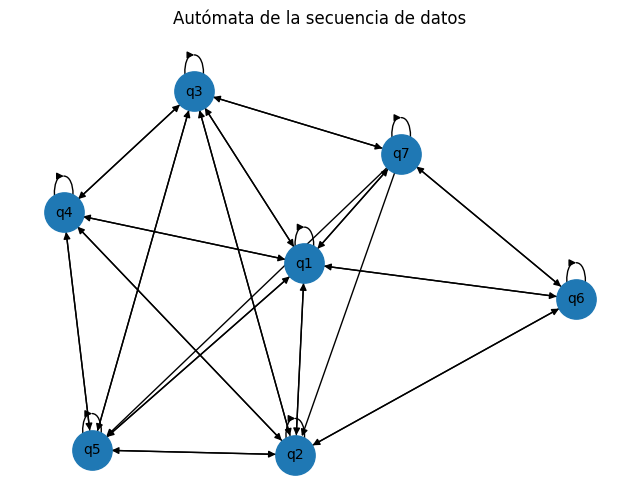

In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

df = pd.read_csv('datos\Final\Procesados\TISIMData_Overtaking_fase2_final.csv')

# Define las condiciones para asignar estados a las secuencias
def asignar_estado(valor):
    valor_entero = int(valor)
    if valor_entero == 0:
        return "q1"
    elif valor_entero == 1:
        return "q2"
    elif valor_entero == 2:
        return "q3"
    elif valor_entero == 3:
        return "q4"
    elif valor_entero == 4:
        return "q5"
    elif valor_entero == 5:
        return "q6"
    elif valor_entero == 6:
        return "q7"
    else:
        return "otro"

# Crea una lista vacía para almacenar la secuencia
secuencia = []

# Recorre el DataFrame y agrega los estados a la secuencia
for i, valor in enumerate(df["New_Clasification"][:-1]):
    estado_actual = asignar_estado(df.loc[i, "New_Clasification"])
    estado_siguiente = asignar_estado(df.loc[i+1, "New_Clasification"])
    secuencia.append((estado_actual, estado_siguiente))

print(secuencia)
# Crea un grafo dirigido utilizando networkx
grafo = nx.DiGraph()

# Crea una lista vacía para almacenar los estados visitados
estados_visitados = []

# Recorre la secuencia y agrega los estados y aristas al grafo
for estado_anterior, estado_actual in secuencia:
    if estado_actual not in estados_visitados:
        grafo.add_node(estado_actual)
        estados_visitados.append(estado_actual)
    grafo.add_edge(estado_anterior, estado_actual)

# Dibuja el autómata
plt.figure(figsize=(8, 6))
pos = nx.spring_layout(grafo, seed=42)
nx.draw_networkx(grafo, pos, with_labels=True, node_size=800, font_size=10)
plt.title("Autómata de la secuencia de datos")
plt.axis("off")
plt.savefig("datos/Final/Grafos/grafoCompleto.png")
plt.show()

# BUSQUEDA DE SUBGRAFOS

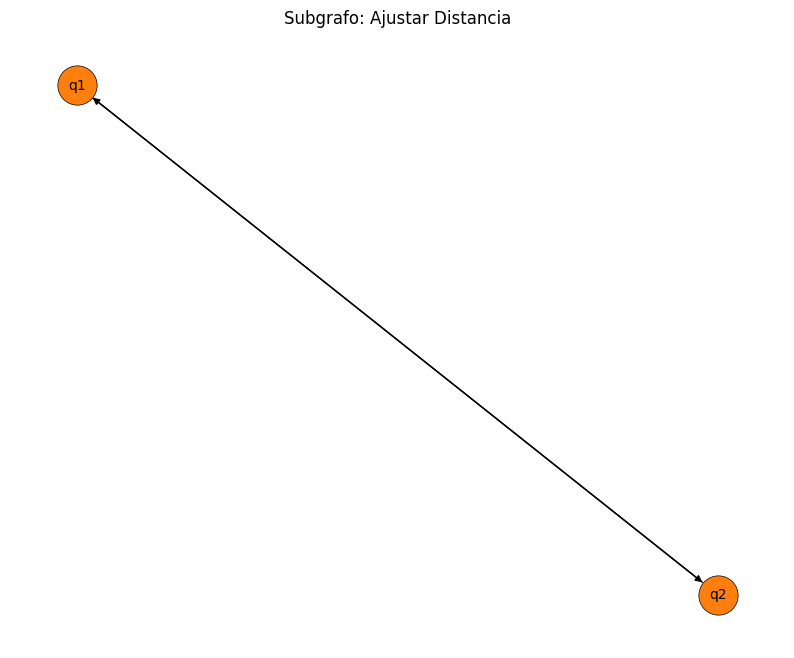

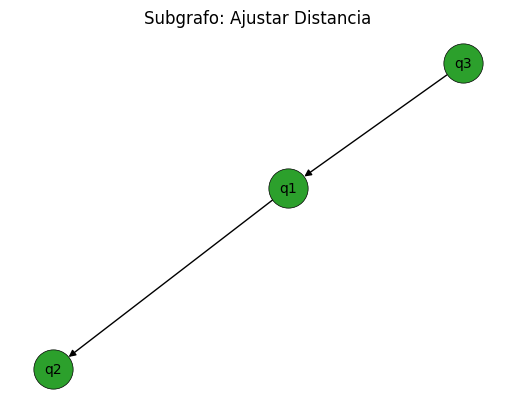

[('q1', 'q2'), ('q2', 'q1'), ('q1', 'q2'), ('q2', 'q3'), ('q3', 'q5'), ('q5', 'q4'), ('q4', 'q5'), ('q5', 'q4'), ('q4', 'q5'), ('q5', 'q4'), ('q4', 'q5'), ('q5', 'q4'), ('q4', 'q5'), ('q5', 'q1'), ('q1', 'q5'), ('q5', 'q1'), ('q1', 'q5'), ('q5', 'q1'), ('q1', 'q5'), ('q5', 'q1'), ('q1', 'q5'), ('q5', 'q1'), ('q1', 'q5'), ('q5', 'q1'), ('q1', 'q5'), ('q5', 'q1'), ('q1', 'q3'), ('q3', 'q1'), ('q1', 'q2'), ('q2', 'q3'), ('q3', 'q2'), ('q2', 'q3'), ('q3', 'q2'), ('q2', 'q3'), ('q3', 'q2'), ('q2', 'q3'), ('q3', 'q2'), ('q2', 'q3'), ('q3', 'q2'), ('q2', 'q3'), ('q3', 'q2'), ('q2', 'q3'), ('q3', 'q2'), ('q2', 'q3'), ('q3', 'q2'), ('q2', 'q3'), ('q3', 'q2'), ('q2', 'q3'), ('q3', 'q2'), ('q2', 'q3'), ('q3', 'q2'), ('q2', 'q3'), ('q3', 'q2'), ('q2', 'q3'), ('q3', 'q2'), ('q2', 'q3'), ('q3', 'q2'), ('q2', 'q3'), ('q3', 'q2'), ('q2', 'q3'), ('q3', 'q2'), ('q2', 'q3'), ('q3', 'q2'), ('q2', 'q3'), ('q3', 'q2'), ('q2', 'q3'), ('q3', 'q2'), ('q2', 'q4'), ('q4', 'q5'), ('q5', 'q3'), ('q3', 'q1'), ('q1'

In [2]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

def asignar_estado(valor):
    valor_entero = int(valor)
    if valor_entero == 0:
        return "q1"
    elif valor_entero == 1:
        return "q2"
    elif valor_entero == 2:
        return "q3"
    elif valor_entero == 3:
        return "q4"
    elif valor_entero == 4:
        return "q5"
    elif valor_entero == 5:
        return "q6"
    elif valor_entero == 6:
        return "q7"
    else:
        return "otro"

def buscar_subgrafos_por_patron(patron_deseado, csv_file, png_file, titulo):
    df = pd.read_csv(csv_file)

    secuencia = []

    for i, valor in enumerate(df["New_Clasification"][:-1]):
        estado_actual = asignar_estado(valor)
        estado_siguiente = asignar_estado(df.loc[i+1, "New_Clasification"])
        if estado_actual != estado_siguiente:
            secuencia.append((estado_actual, estado_siguiente))

    secuencias_cumplen_patron = []
    for i in range(len(secuencia) - len(patron_deseado) + 1):
        subsecuencia = secuencia[i:i+len(patron_deseado)]
        if all(subsecuencia[j] == patron_deseado[j] or subsecuencia[j][1] == patron_deseado[j][1] for j in range(len(patron_deseado))):
            secuencias_cumplen_patron.append(subsecuencia)

    subgrafos = []
    for secuencia_cumple_patron in secuencias_cumplen_patron:
        subgrafo = nx.DiGraph(secuencia_cumple_patron)
        if not any(nx.is_isomorphic(subgrafo, g) for g in subgrafos):
            subgrafos.append(subgrafo)

    if subgrafos:
        contador = 1
        plt.figure(figsize=(10, 8))
        pos = nx.spring_layout(subgrafos[0], seed=42)
        for i, subgrafo in enumerate(subgrafos):
            nx.draw_networkx(
                subgrafo,
                with_labels=True,
                node_size=800,
                font_size=10,
                node_color=f"C{i+1}",
                edgecolors="black",
                linewidths=0.5,
            )
            plt.title("Subgrafo: " + titulo)
            plt.axis("off")
            plt.savefig(png_file + str(contador) + ".png")
            plt.show()
            contador += 1

    print(secuencia)

# Ejemplo de uso
adelantar_dch = [("q2", "q4"), ("q4", "q5")]
ajustar_distancia = [("q3", "q1"), ("q1", "q2")]
adelantar_izq = [("q1", "q6"), ("q6", "q7")]
csv_file = 'datos/Final/Procesados/TISIMData_Overtaking_fase2_final.csv'
png_file = 'datos/Final/Grafos/ajutarDistancia'
titulo = 'Ajustar Distancia'
buscar_subgrafos_por_patron(ajustar_distancia, csv_file, png_file, titulo)
